In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification of clear speech-detection

In [92]:
pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fnamecl='Allsube12.xlsx'
d=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


In [106]:
# allacc=[];
# for count in range(2,108):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=106*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5]
#         labels=c.iloc[:,5]

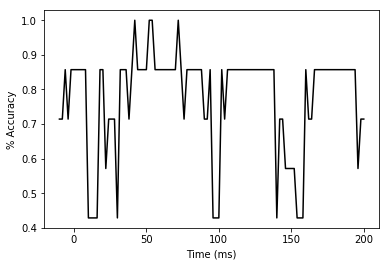

In [108]:
allacc=[];
for count in range(2,108):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
        #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acd=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acd,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [1]:
#c

In [29]:
#print par
time=pd.DataFrame(t)
tad=pd.concat([time, Acd],axis=1)
selt=tad.iloc[25:34]
av=selt.mean()
print selt,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0         0
25  40.0  0.857143
26  42.0  1.000000
27  44.0  0.857143
28  46.0  0.857143
29  48.0  0.857143
30  50.0  0.857143
31  52.0  1.000000
32  54.0  1.000000
33  56.0  0.857143 
The average accuracy over the time is: 90.4761904762


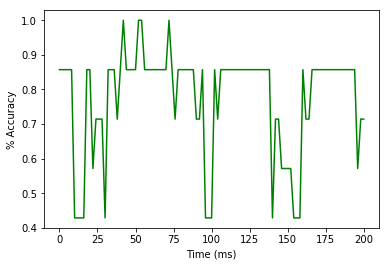

In [9]:
t1=tad.iloc[5:,0];Acd1=tad.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification of noise-degraded speech classification

In [25]:
pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fnameno='Allsuballnoise.xlsx'
dn=pd.read_excel(pathr+fnameno)
print("Total rows: {0}".format(len(dn)))

Total rows: 32


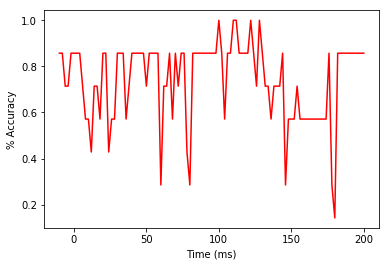

In [20]:
allacc=[];
for count in range(2,108):
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=dn.values[i,k+count]
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=dn.values[i,0]
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
#         #print y
#     #print X
#     X_scaled = preprocessing.scale(X)
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
#     #par=np.unique(y_test,return_counts=True)
#     cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
#     parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
#     svc = svm.SVC()
#     clf = GridSearchCV(svc, parameters,cv=cv)
#     clf.fit(X_train, y_train)
#     accf= clf.cv_results_['mean_test_score']
#     accf
#     acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
#     allacc.append(acc)
#     Acdn=pd.DataFrame(allacc)
#     #print acc*100.0
# t=np.linspace(-10,200,106)
# #Acd.plot(kind='line',ylim=[0,1])
# plt.plot(t,Acdn,c='r')
# plt.xlabel('Time (ms)')
# plt.ylabel('% Accuracy')
# #print par

In [28]:
#print par
time=pd.DataFrame(t)
tadn=pd.concat([time, Acdn],axis=1)
seltn=tadn.iloc[53:63]
av=seltn.mean()
print seltn,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[40:60]
#tadn.to_csv('Noise-degraded.csv')

        0         0
53   96.0  0.857143
54   98.0  0.857143
55  100.0  1.000000
56  102.0  0.857143
57  104.0  0.571429
58  106.0  0.857143
59  108.0  0.857143
60  110.0  1.000000
61  112.0  1.000000
62  114.0  0.857143 
The average accuracy over the time is: 87.1428571429


In [ ]:
t1=tad.iloc[5:,0];Acd1=tad.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification of NH & HL from clear and noise-degraded

In [52]:
# Allclno=pd.concat([d,dn],join_axes=None,axis=0)
# print Allclno.shape, d.shape

(64, 534) (32, 532)


In [59]:
pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fnameall='Allsube_clean_noise.xlsx'
dall=pd.read_excel(pathr+fnameall)
print("Total rows: {0}".format(dall.shape))

Total rows: (64, 532)


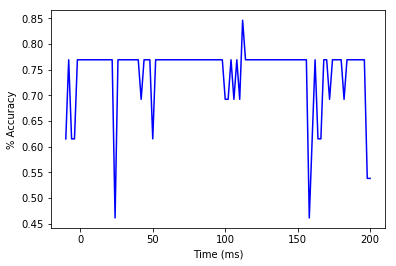

In [77]:
allacc=[];
for count in range(2,108):
    dpc=[];yc=[];
    for i in range(1,64):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=dall.values[i,k+count]; # dall is the data matrix
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=dall.values[i,0] # dall is the data matrix
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
        #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acdall=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdall,c='b')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [86]:
#print par
time=pd.DataFrame(t)
tadn=pd.concat([time, Acdn],axis=1)
seltn=tadn.iloc[53:65]
av=seltn.mean()
print seltn,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[40:60]
#tadn.to_csv('Noise-degraded.csv')
tadn.max(axis=0)

        0         0
53   96.0  0.769231
54   98.0  0.769231
55  100.0  0.692308
56  102.0  0.692308
57  104.0  0.769231
58  106.0  0.692308
59  108.0  0.769231
60  110.0  0.692308
61  112.0  0.846154
62  114.0  0.769231
63  116.0  0.769231
64  118.0  0.769231 
The average accuracy over the time is: 75.0


0    200.000000
0      0.846154
dtype: float64